<a href="https://colab.research.google.com/github/VictoriaAkintomide/SCA-MP-C4-Assessments/blob/main/All_Space_Missions_from_1957_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset contains some details all the space missions since the beginning of Space Race (1957). 

In [27]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
#importing dataset
data = pd.read_csv('Space_Corrected.csv')

In [29]:
#priting the first five rowsa
data.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [30]:
#dropping the first two columns

data= data.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [31]:
data.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [32]:
#general information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    4324 non-null   object
 1   Location        4324 non-null   object
 2   Datum           4324 non-null   object
 3   Detail          4324 non-null   object
 4   Status Rocket   4324 non-null   object
 5    Rocket         964 non-null    object
 6   Status Mission  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [33]:
#checking for null values per column
data.isnull().sum()

Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64

This dataset contains 4324 rows and 6 columns.

The 'Rocket' column has only null values. The other columns do not contain any null values. 



In [34]:
#convert the Datum column to a datetime object

data['DateTime'] = pd.to_datetime(data['Datum'])

# Extract the launch year
data['Year'] = data['DateTime'].apply(lambda datetime: datetime.year)

# Extract the country of launch
data["Country"] = data["Location"].apply(lambda location: location.split(", ")[-1])


###Space Missions Per Company

In [35]:
space_missions_per_company = data['Company Name'].value_counts()
space_missions_per_company

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ESA                   13
Eurockot              13
ISA                   13
Rocket Lab            13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
AMBA                   8
CNES                   8
MITT                   7
Land Launch            7
JAXA                   7
UT                     5
CASIC                  5
KCST                   5
CECLES                 4
Arm??e de l'Air        4
Exos                   4


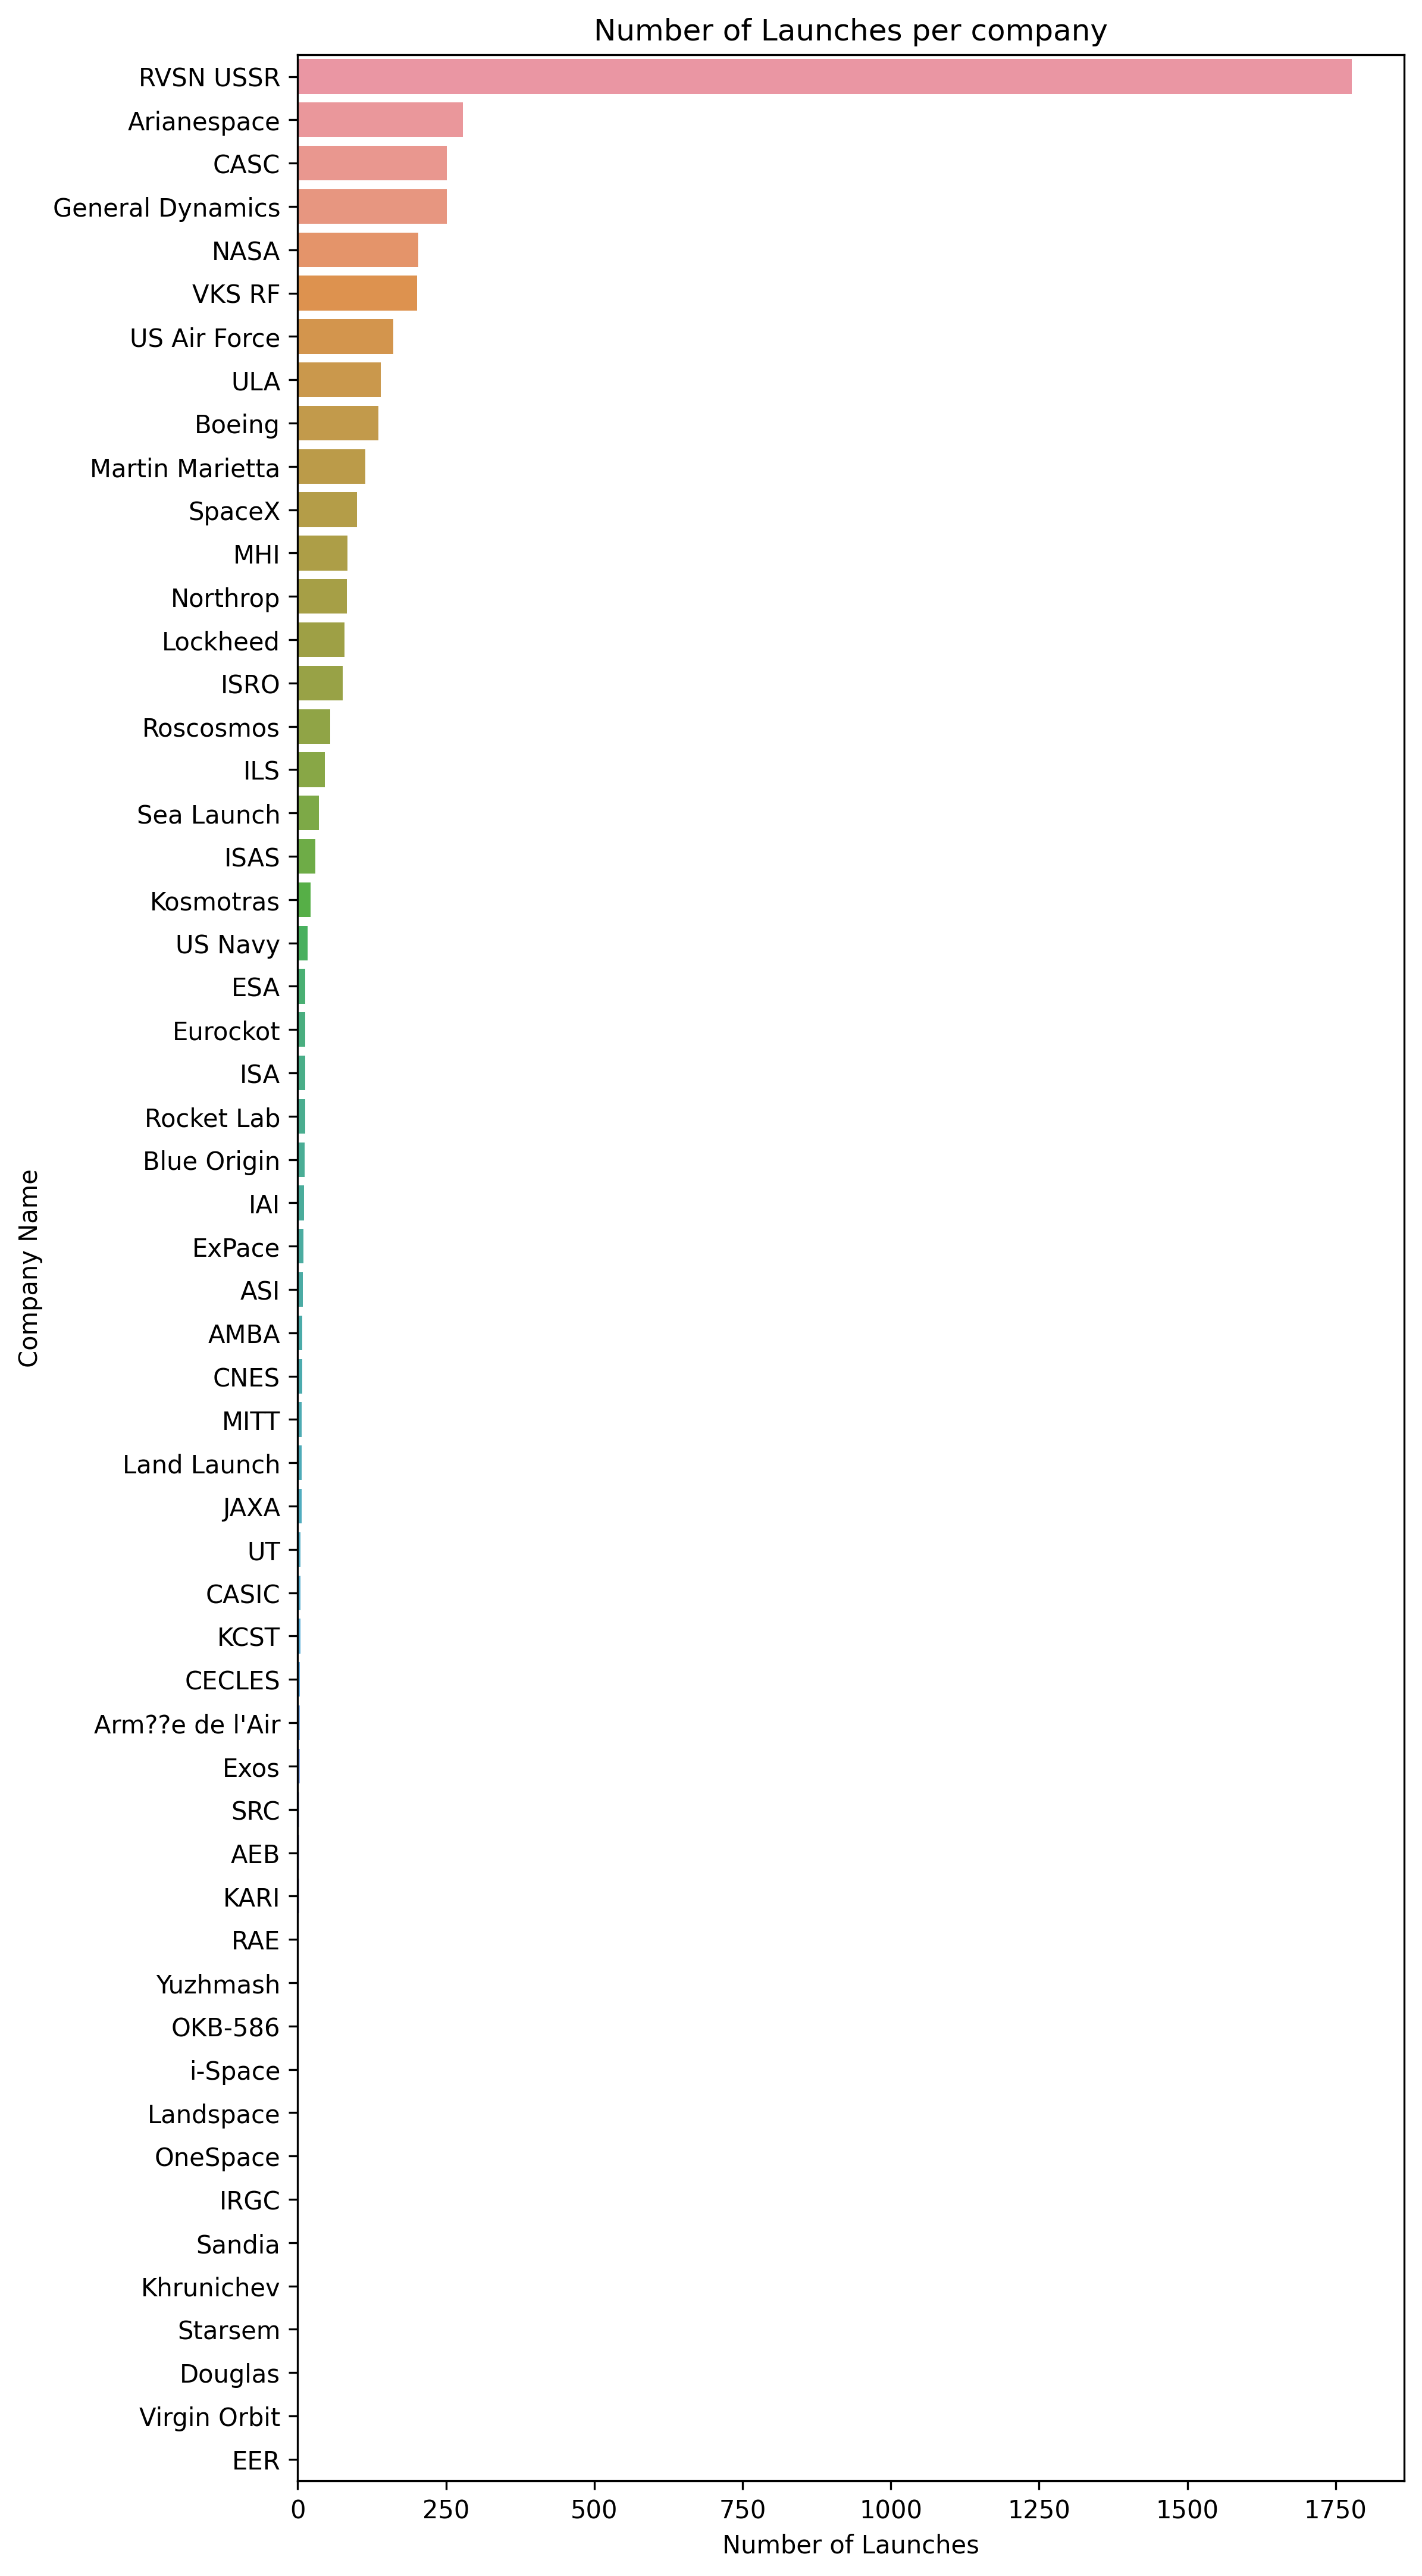

In [47]:
plt.figure(figsize=(8, 18))
plt.rcParams['figure.dpi'] = 360
sns.countplot(y='Company Name', data=data, order=data['Company Name'].value_counts().index)
plt.title('Number of Launches per company')
plt.xlabel('Number of Launches')
plt.savefig('company.png')
plt.show()


#### Rocket Status

In [37]:
data['Status Rocket'].value_counts()

StatusRetired    3534
StatusActive      790
Name: Status Rocket, dtype: int64

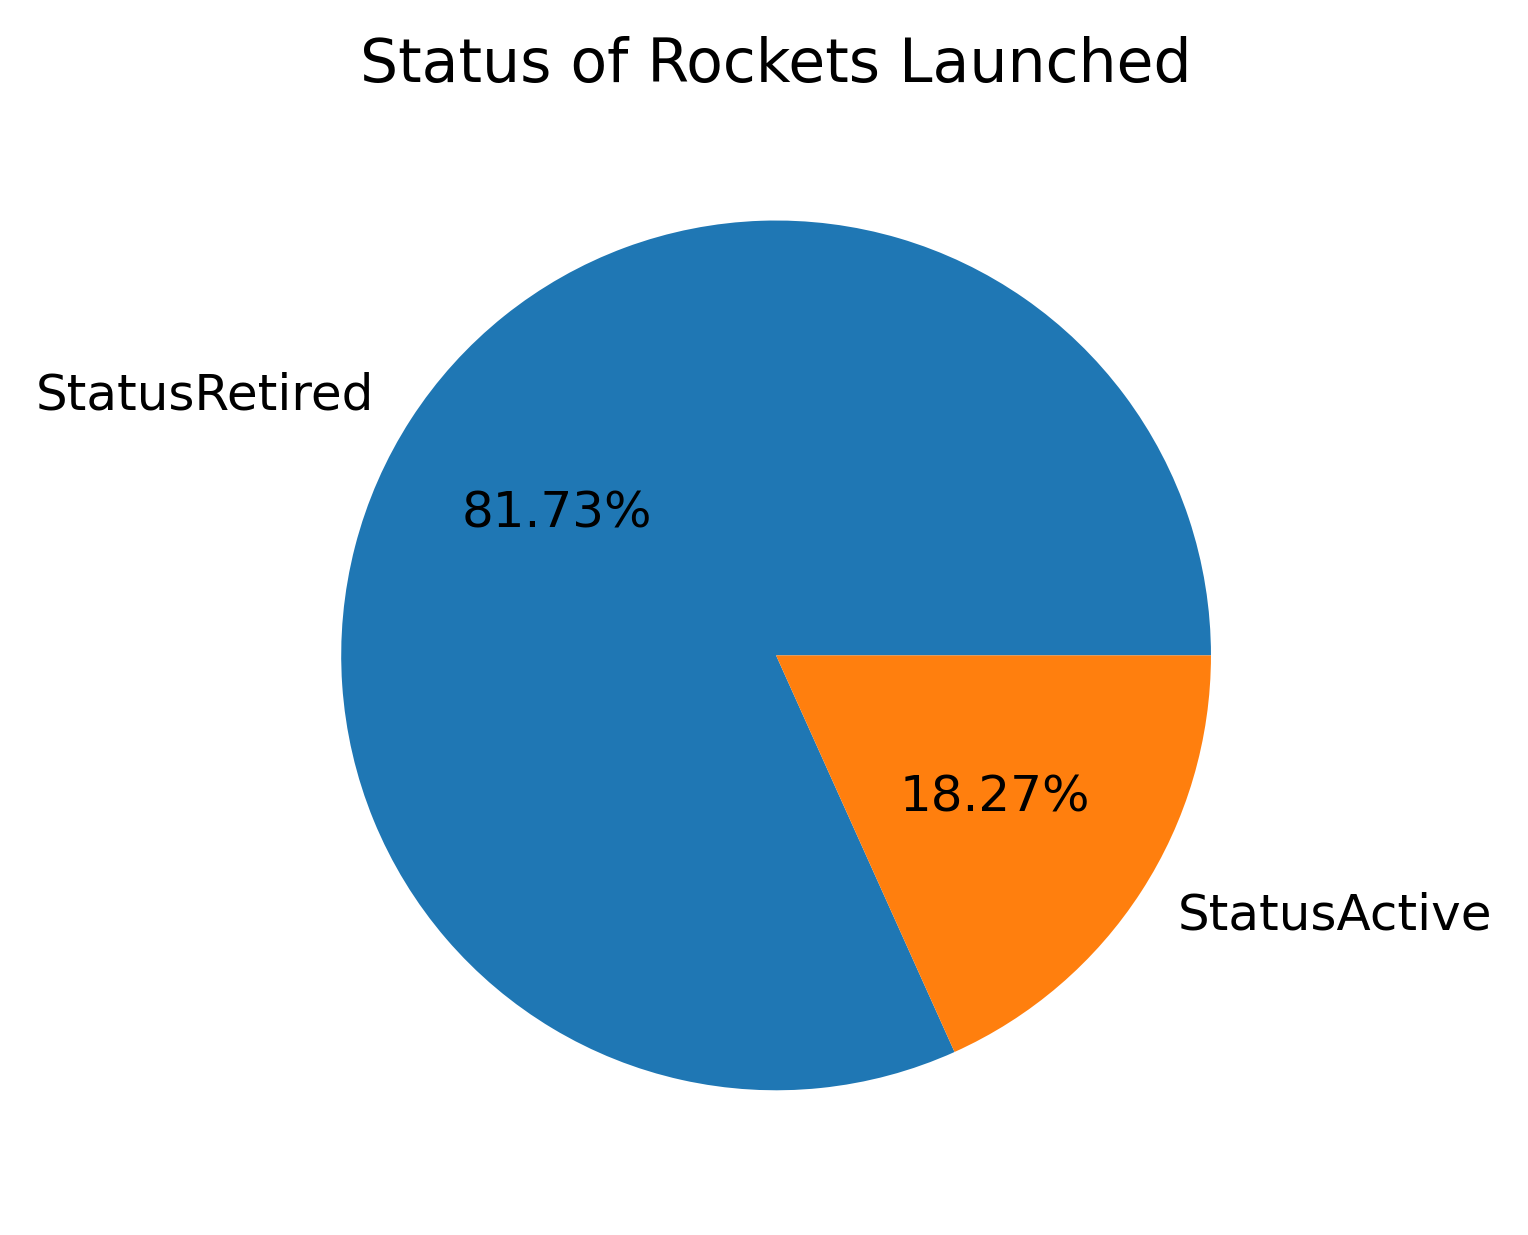

In [38]:
plt.rcParams['figure.dpi'] = 360
ax = data['Status Rocket'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.title('Status of Rockets Launched')
ax.set_ylabel('')
plt.savefig('status.png')
plt.show()

In [39]:
data['Status Mission'].value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Status Mission, dtype: int64

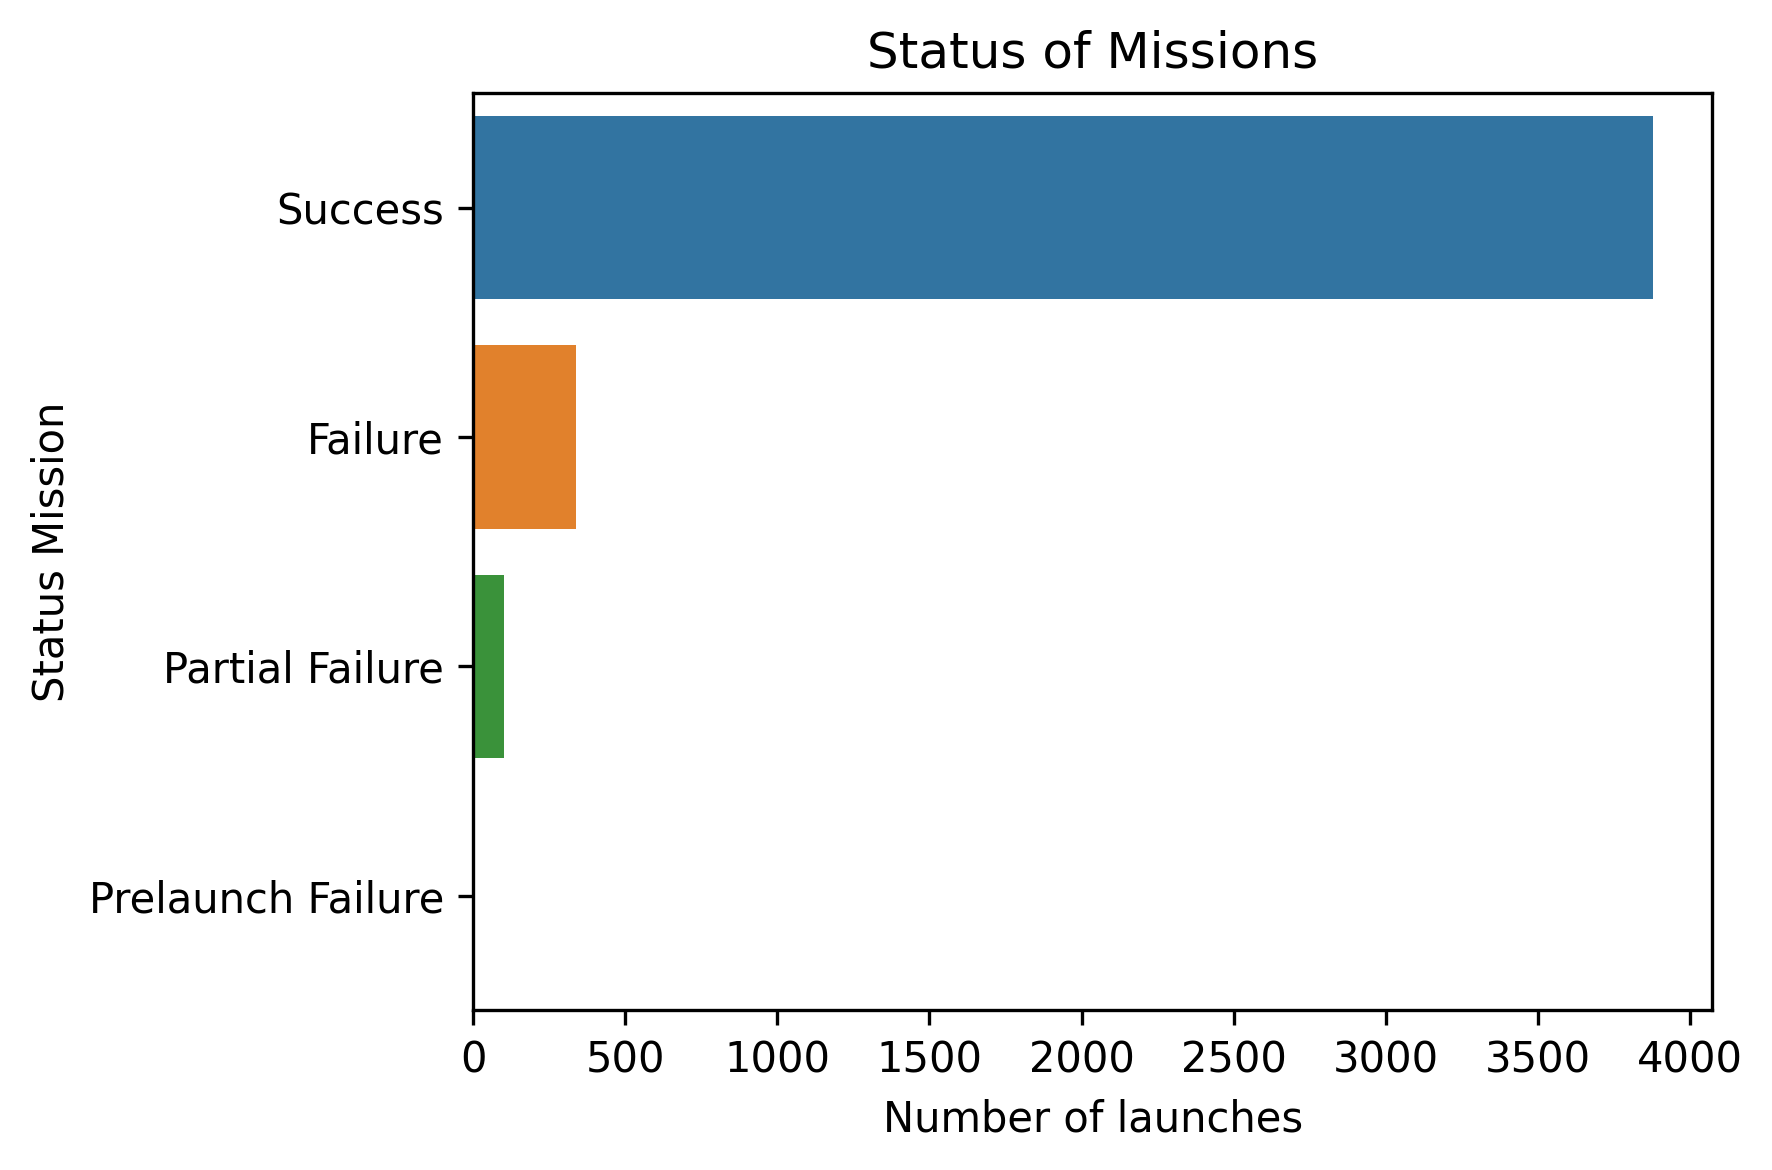

In [51]:

plt.rcParams['figure.dpi'] = 300
sns.countplot(y='Status Mission', data=data, order=data['Status Mission'].value_counts().index)
plt.title('Status of Missions')
plt.xlabel('Number of launches')
plt.tight_layout()

plt.savefig('mission.png', bbox_inches="tight")
plt.show()

#### Rockets Value Distribution

In [41]:
data[' Rocket'].value_counts()

450.0       136
200.0        75
40.0         55
62.0         41
30.8         38
109.0        37
50.0         34
64.68        34
29.75        33
90.0         32
41.8         31
48.5         26
29.15        25
31.0         22
29.0         22
59.0         22
69.7         17
21.0         16
65.0         16
35.0         16
56.5         15
37.0         15
164.0        15
7.5          14
1,160.0      13
47.0         13
25.0         12
153.0        11
350.0        11
45.0         10
112.5         9
5.3           9
123.0         8
85.0          7
145.0         7
80.0          7
120.0         7
115.0         6
7.0           5
46.0          5
59.5          5
63.23         4
136.6         4
190.0         3
130.0         3
140.0         3
133.0         3
39.0          2
5,000.0       2
135.0         2
15.0          1
12.0          1
20.14         1
20.0          1
28.3          1
55.0          1
Name:  Rocket, dtype: int64

#### Country Launches

In [42]:
data['Country'].value_counts()

Russia                            1395
USA                               1344
Kazakhstan                         701
France                             303
China                              268
Japan                              126
India                               76
Pacific Ocean                       36
Iran                                13
New Zealand                         13
Israel                              11
Kenya                                9
Australia                            6
North Korea                          5
New Mexico                           4
Barents Sea                          3
South Korea                          3
Brazil                               3
Gran Canaria                         2
Pacific Missile Range Facility       1
Yellow Sea                           1
Shahrud Missile Test Site            1
Name: Country, dtype: int64

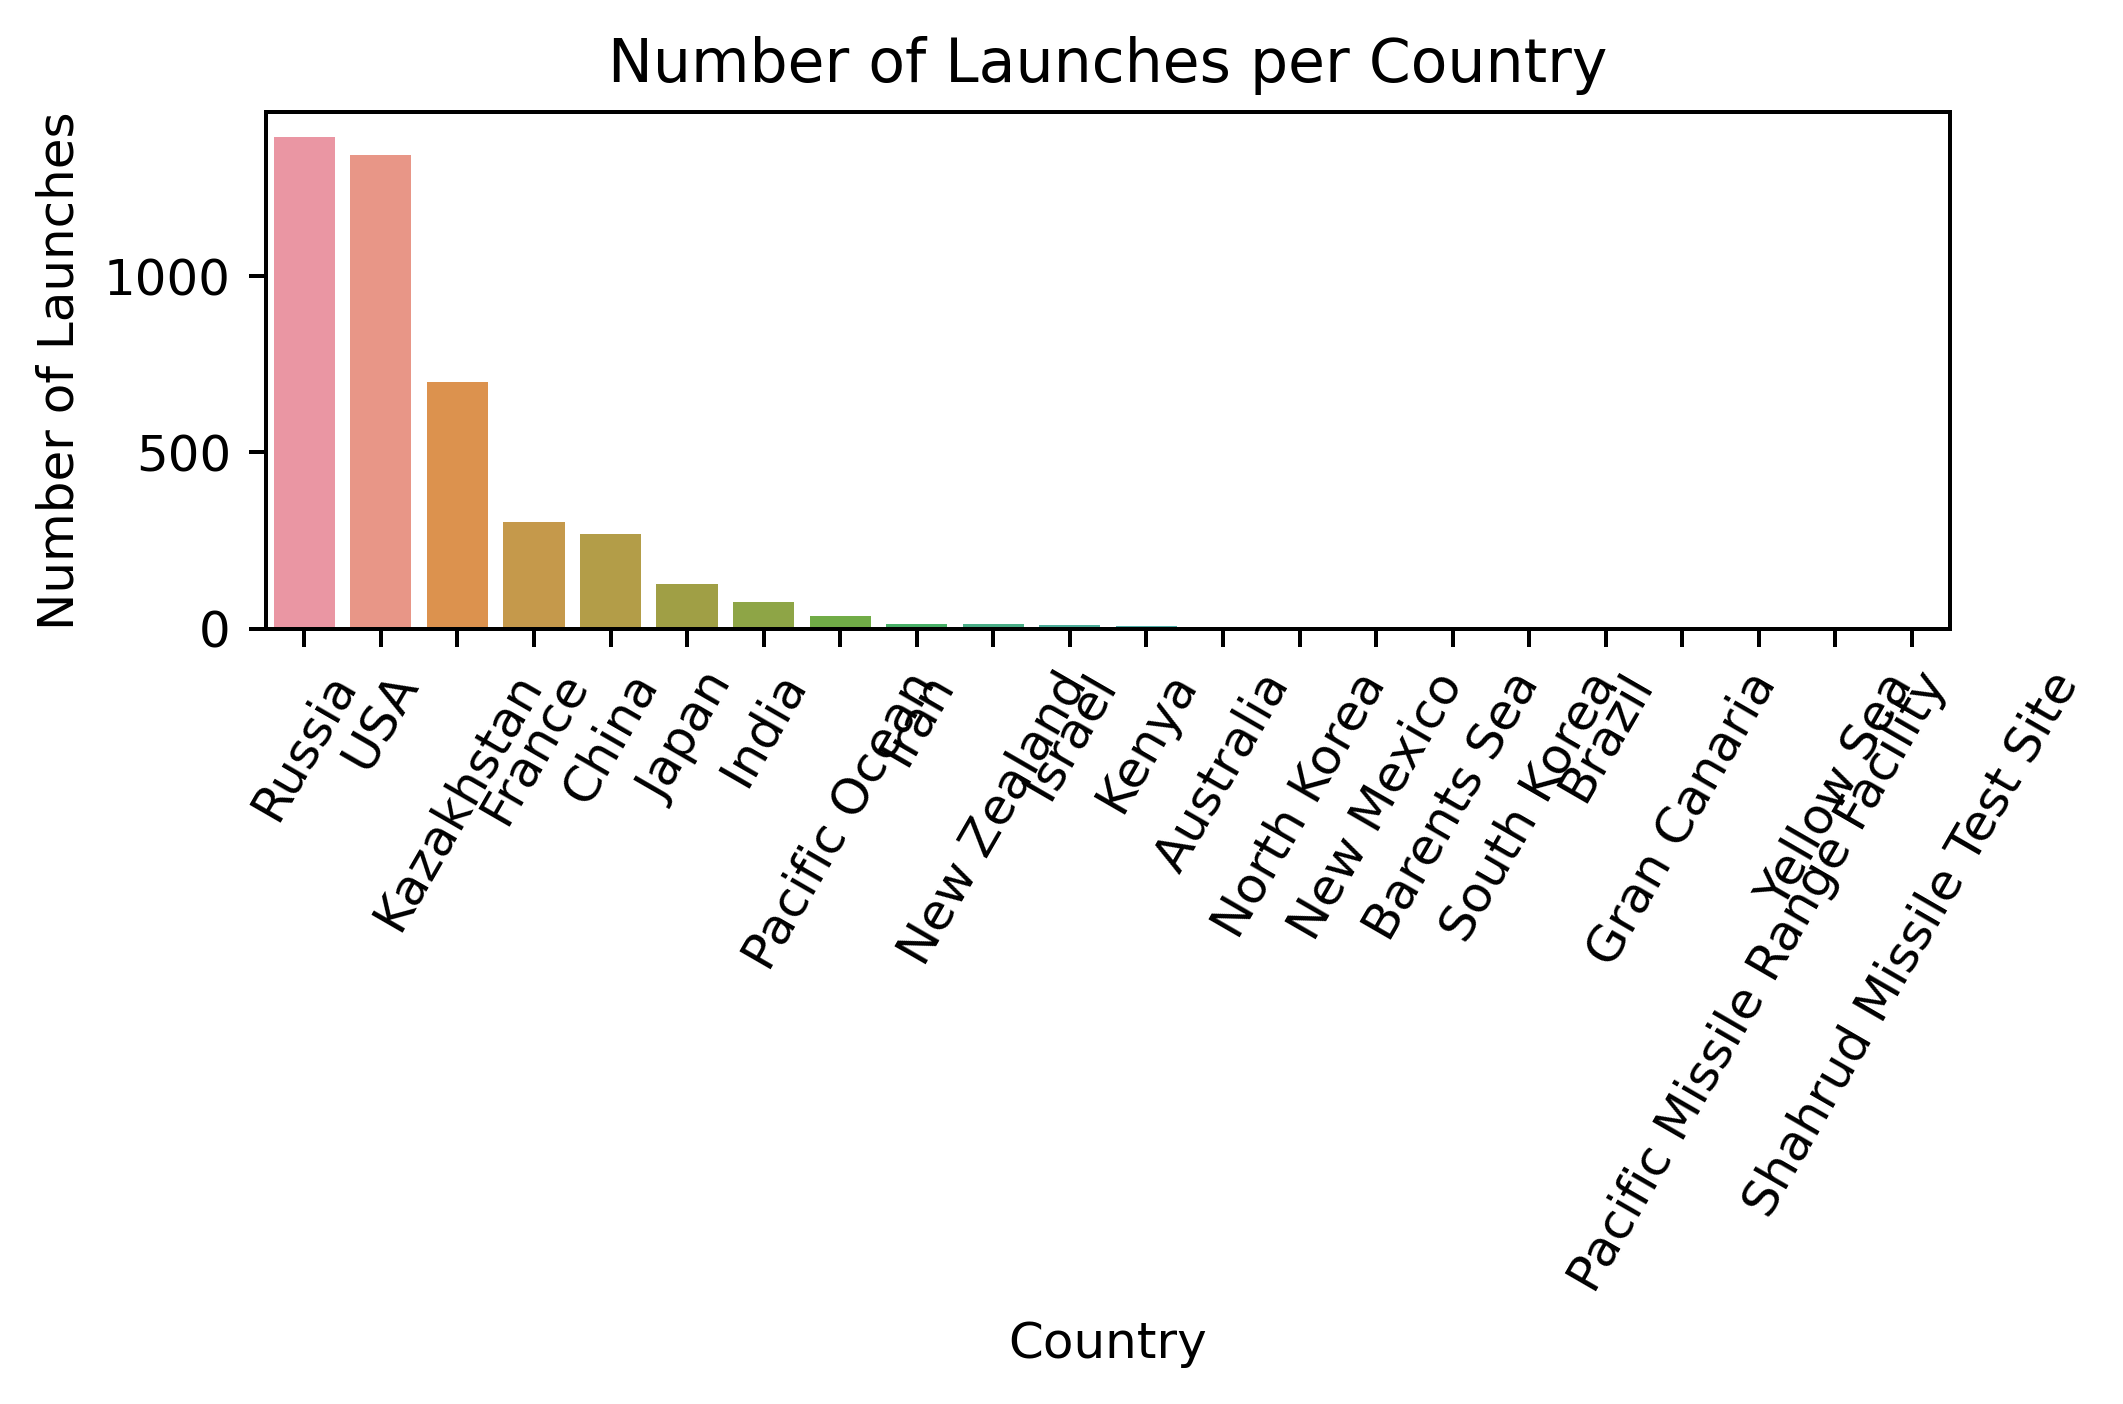

In [48]:

plt.rcParams['figure.dpi'] = 360
sns.countplot(x='Country', data=data, order=data['Country'].value_counts().index)
plt.title('Number of Launches per Country')
plt.ylabel('Number of Launches')
plt.xticks(rotation=60)
plt.savefig('country.png')
plt.tight_layout()
plt.show()

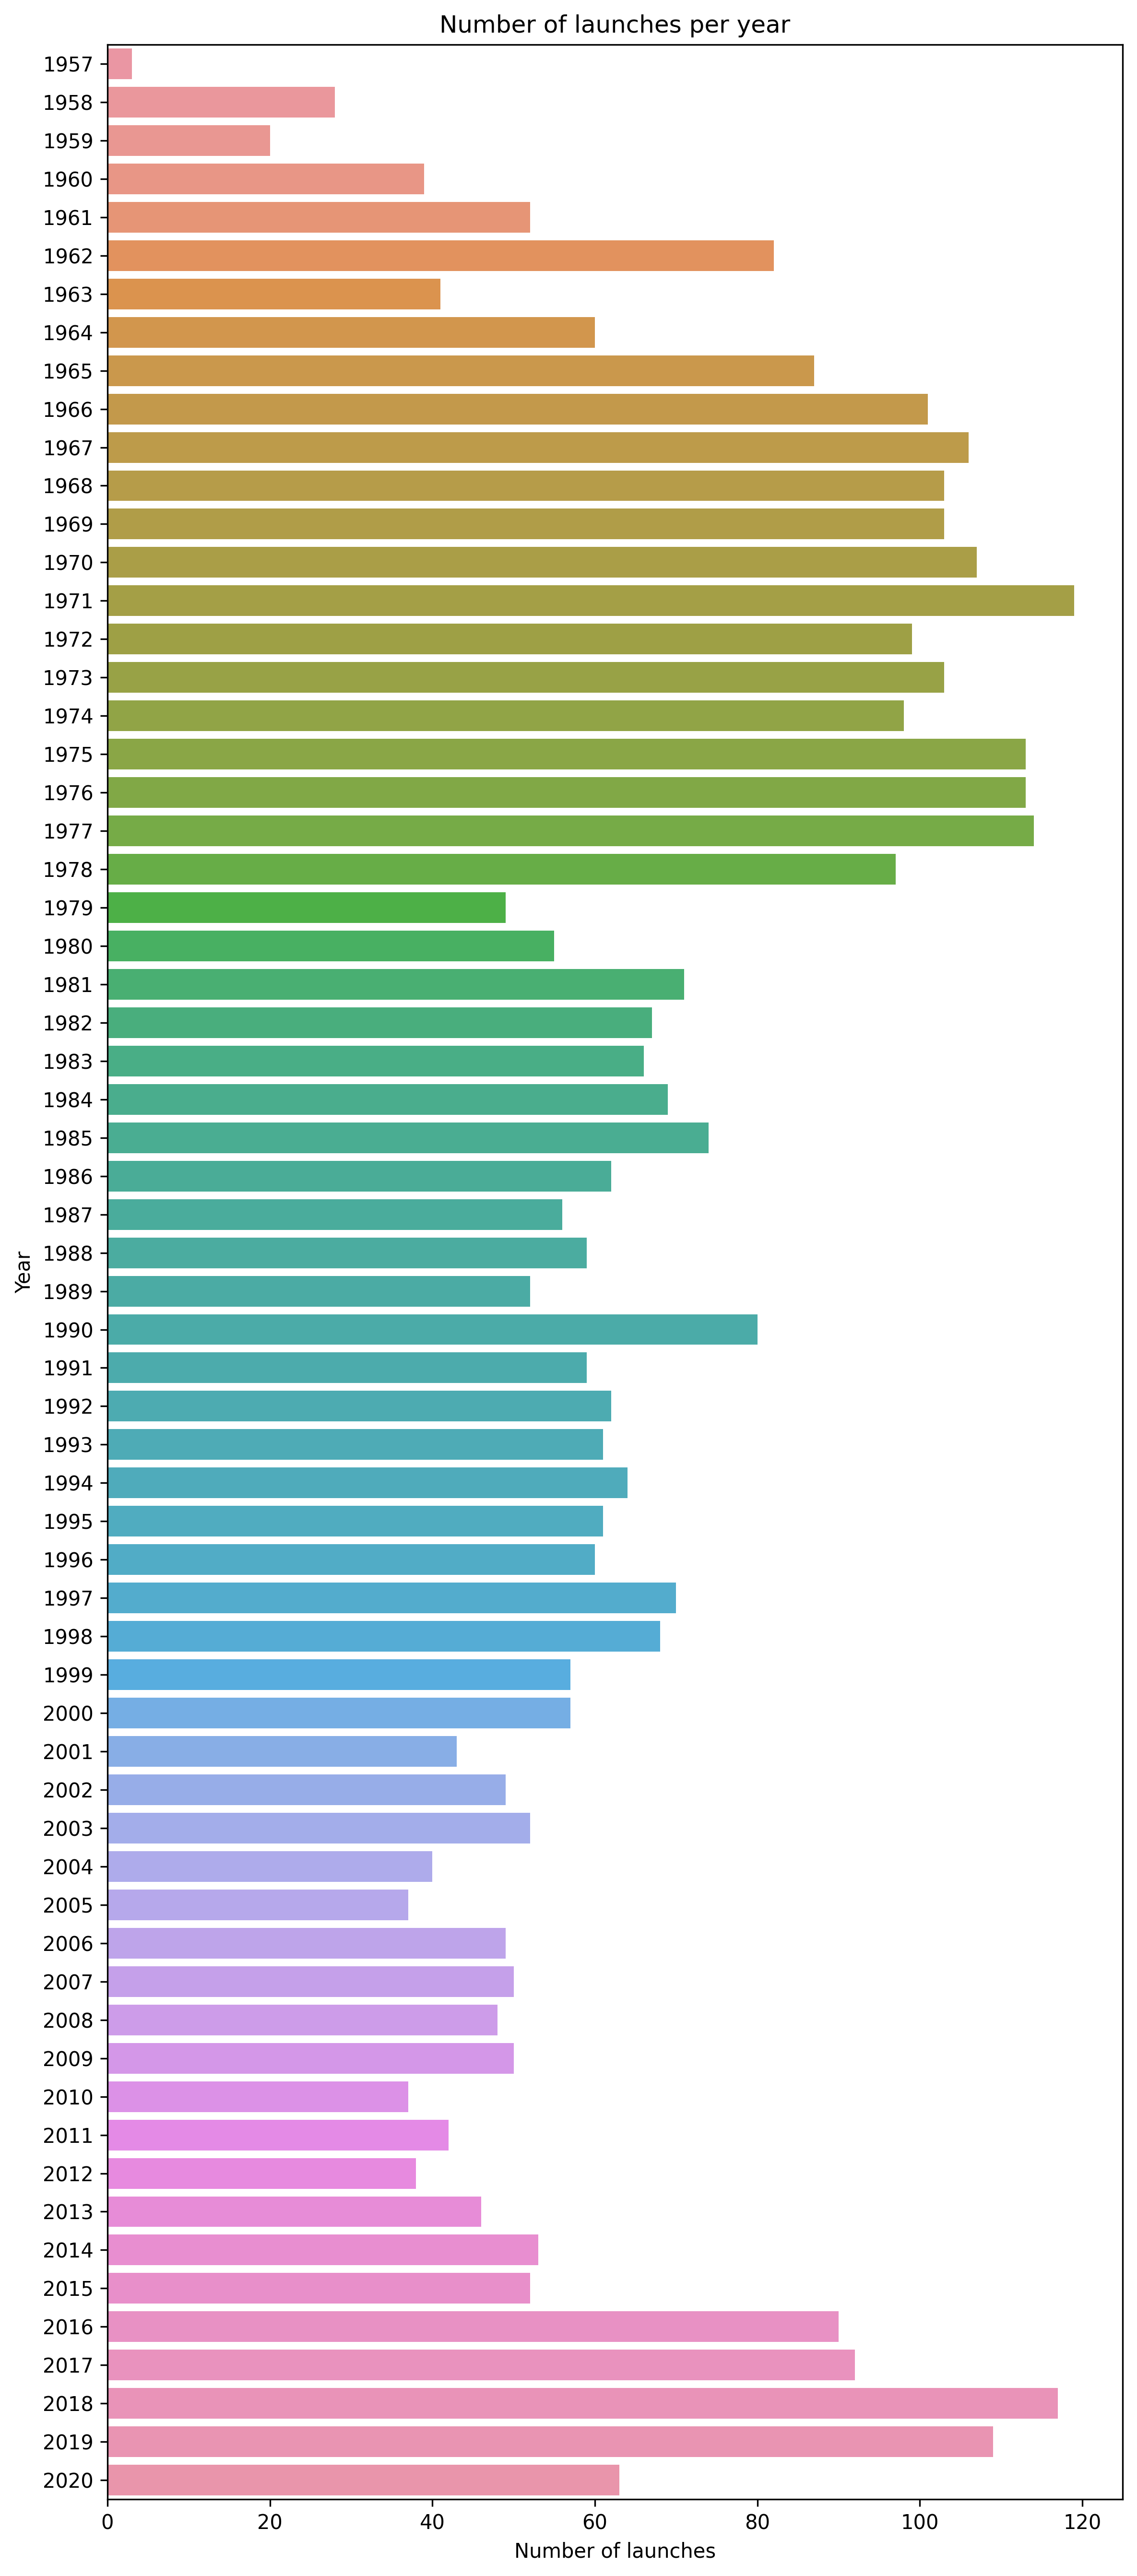

In [45]:
plt.rcParams['figure.dpi'] = 300
plt.figure(figsize=(8,18))
ax = sns.countplot(y=data['Year'])
plt.title('Number of launches per year')
plt.xlabel('Number of launches')
plt.savefig('year.png')
plt.tight_layout()
plt.show()


In [49]:
data['Year'].value_counts()

1971    119
2018    117
1977    114
1976    113
1975    113
       ... 
2005     37
2010     37
1958     28
1959     20
1957      3
Name: Year, Length: 64, dtype: int64

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    4324 non-null   object
 1   Location        4324 non-null   object
 2   Datum           4324 non-null   object
 3   Detail          4324 non-null   object
 4   Status Rocket   4324 non-null   object
 5    Rocket         964 non-null    object
 6   Status Mission  4324 non-null   object
 7   DateTime        4324 non-null   object
 8   Year            4324 non-null   int64 
 9   Country         4324 non-null   object
dtypes: int64(1), object(9)
memory usage: 337.9+ KB
